# モデルの性能評価

## 回帰の評価指標

* **平均絶対誤差（MAE）**

  * 誤差の方向を考慮せず、誤差の平均的な大きさを測定
  * 使用例：すべての誤差が同等に重要な場合に適している

* **平均二乗誤差（MSE）**

  * 実測値と予測値の差を二乗し、その平均を測定
  * 使用例：MAEよりも大きな誤差を強く罰するため、外れ値に敏感

* **二乗平均平方根誤差（RMSE）**

  * MSE の平方根を取り、誤差を目的変数と同じ単位で提供
  * 使用例：実際の単位で解釈しやすいため、一般的によく使われる指標

* **決定係数（R²）**

  * モデルが目的変数の変動をどの程度説明できているかを測定
  * 使用例：モデルが説明できる分散の割合を示す


## 分類の評価指標

* **正解率（Accuracy）**

  * 正しく分類されたインスタンスの割合
  * 使用例：データセットが均衡している場合に適しているが、不均衡データでは誤解を招く可能性がある

* **適合率（Precision）**

  * 予測が陽性だった中で、実際に陽性だった割合
  * 使用例：偽陽性のコストが高い場合に重要（例：スパム検出）

* **再現率（Recall／感度 Sensitivity）**

  * 実際に陽性だった中で、正しく陽性と予測できた割合
  * 使用例：偽陰性のコストが高い場合に重要（例：医療診断）

* **F1スコア（F1 Score）**

  * 適合率と再現率の調和平均
  * 使用例：不均衡データセットに有用

* **ROC-AUC**

  * モデルがクラスを識別する能力を測定
  * 使用例：二値分類器の評価に重要


## 各指標を使用するタイミングの理解

* **回帰（Regression）**

  * 誤差の解釈性と均等な重要度を求める場合は MAE を使用
  * 大きな誤差をより強く罰したい場合は MSE / RMSE を使用
  * 分散の説明には R² を使用するが、単独の性能指標としては使用しない

* **分類（Classification）**

  * データセットが均衡している場合は Accuracy を使用
  * データセットが不均衡な場合は、問題の焦点（例：偽陽性または偽陰性の最小化）に応じて Precision と Recall を使用
  * Precision と Recall をバランス良く評価する場合は F1 スコアを使用
  * 二値分類におけるモデル全体の性能評価には ROC-AUC を使用

---
## 演習
1. 分類モデル評価
2. 回帰モデル評価

#### 分類モデル（iris）

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
data = load_iris()
X = data.data
y = (data.target == 0).astype(int)  # target(品種)がクラス 0 なら True -> 1, それ以外は False -> 0

In [12]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

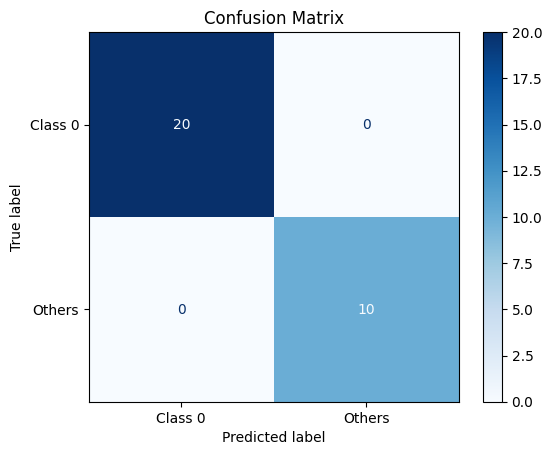

In [17]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Others"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Classification metrics
print("\n Classification Report")
print(classification_report(y_test, y_pred))


 Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 回帰モデル

In [30]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

In [21]:
data = load_diabetes(as_frame=True)

data.target     # disease progression (the greater the value, the worse condition)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [20]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


Meaning of each column:

| Column  | Meaning                        | Details                                                     |
| ------- | ------------------------------ | ----------------------------------------------------------- |
| **age** | Age                            | Normalized to have mean 0 and variance 1                    |
| **sex** | Sex                            | Encoded as a binary variable (male/female), then normalized |
| **bmi** | Body Mass Index                | Weight (kg) / height² (m²), normalized                      |
| **bp**  | Blood pressure                 | Average blood pressure measurement, normalized              |
| **s1**  | Serum cholesterol              | Normalized measurement                                      |
| **s2**  | Low-density lipoprotein (LDL)  | “Bad cholesterol”, normalized                               |
| **s3**  | High-density lipoprotein (HDL) | “Good cholesterol”, normalized                              |
| **s4**  | Total cholesterol / HDL ratio  | Risk ratio for cardiovascular disease, normalized           |
| **s5**  | Serum triglycerides            | Fat in the blood, normalized                                |
| **s6**  | Blood sugar level              | Fasting blood glucose, normalized                           |

In [31]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data.data, y, test_size=0.2, random_state=42)

# Train model and evaluate
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2-Score: {r2}")


Mean Absolute Error (MAE): 42.79409467959994
Mean Squared Error (MSE): 2900.1936284934814
R2-Score: 0.4526027629719195
